<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    📚 IMPORTING LIBRARIES 📚
</h2>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("../input"))
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

['fruits']
fruits



<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Libraries:</b> Successfully import the recquired library
</div>

<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    🧾 LOADING DATA 🧾
</h2>


In [2]:
np.random.seed(1234)
directory="/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training"
classes=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]

all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        #img_array=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        #img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])

In [3]:
directory2="/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test"
classes2=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        #img_array2=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        #img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])

At the beginning we had only images, not any dataframe or any array from. We used os and cv2 libraries to created our array form. 

<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    🍇 Sample Images 🍎
</h2>


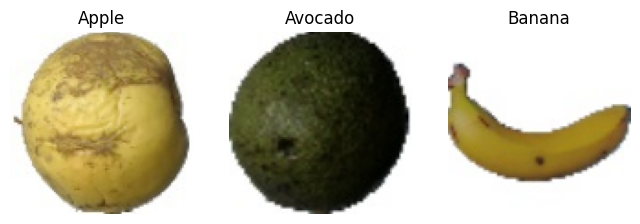

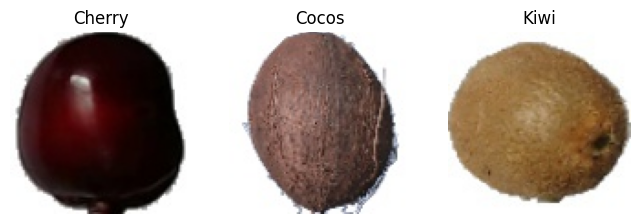

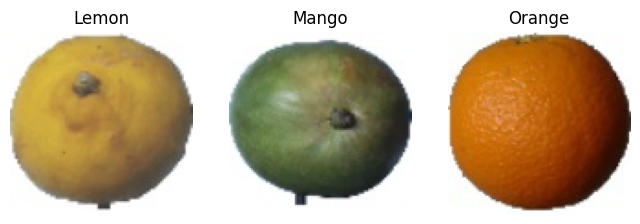

In [4]:
fruits_array_train=[]
for features,label in all_arrays:
    fruits_array_train.append(features)

location=[[1,500,1150],[1500,2000,2500],[3000,3500,4000]]
fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
a=0
b=1
c=2
for i,j,k in location:
    plt.subplots(figsize=(8,8))
    plt.subplot(1,3,1)
    plt.imshow(fruits_array_train[i])
    plt.title(fruit_names[a])
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(fruits_array_train[j])
    plt.title(fruit_names[b])
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(fruits_array_train[k])
    plt.title(fruit_names[c])
    plt.axis("off")
    a+=3
    b+=3
    c+=3

<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    🧬 Creating Features 🧬
</h2>


In [5]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) #arraying


We created our X features and Y labels. Also we used shuffle function to mix our dataset.

<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    🧾 Normalization 🧾
</h2>


In [6]:
#normalization and reshaping
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (4306, 100, 100, 3)
shape of X_test=   (1445, 100, 100, 3)


While reshaping we added RGB scale.

<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    🧾 Comverting Into Categorical Form 🧾
</h2>


In [7]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=9)
Y_test=to_categorical(Y_test,num_classes=9)

2024-05-31 19:48:32.437296: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 19:48:32.437451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 19:48:32.609397: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


We converted our labels to one-hot-encoding values. 3 ----->(0,0,0,1,0,0,0,0,0,0) etc

In [8]:
Y_train.shape

(4306, 9)

In [9]:
X_train.shape

(4306, 100, 100, 3)

<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    🧾 Train-Test-Split 🧾
</h2>


In [10]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

With train_test_split we separated our datas to train and validation datas.

<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    🛠 Model Architecture 🛠
</h2>


In [11]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3, 3), padding="Same", activation="relu", input_shape=(100, 100, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation="softmax"))

# Defining optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

epochs = 10
batch_size = 18


We connected our labels-layers with keras library. With Dense we added hidden layers. We avoided overfitting thanks to Dropout. With relu function we don't have variance around zero.

Let's go with data augmentation. In this section we add different shapes of our images. We will use **zooming,shifting,rotating,fliping** methods in order to avoid **overfitting**.                                                             
For example we will add a image of banana with 5 degrees rotated.

<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    🧬 Model Training 🧬
</h2>


In [12]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

# Assuming x_train and y_train are defined
datagen.fit(x_train)

# Model fitting using `fit` method
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_val, y_val),
    steps_per_epoch=x_train.shape[0] // batch_size
)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.4712 - loss: 1.4513 - val_accuracy: 0.9977 - val_loss: 0.1593
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8889 - loss: 0.2649 - val_accuracy: 0.9977 - val_loss: 0.1593
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.9707 - loss: 0.0950 - val_accuracy: 0.9501 - val_loss: 0.1236
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0125 - val_accuracy: 0.9559 - val_loss: 0.1049
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - accuracy: 0.9853 - loss: 0.0501 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.9898 - loss: 0.0333 - val_accuracy: 1.0000 - val_loss: 0.0103
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0105 - val_a

<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    💹 Model Training Graph 📈
</h2>


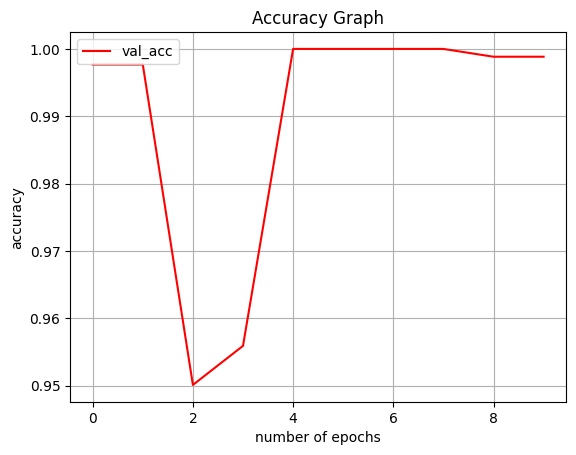

In [13]:
plt.plot(history.history["val_accuracy"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    🧾 Confusion Matrix 🧾
</h2>


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


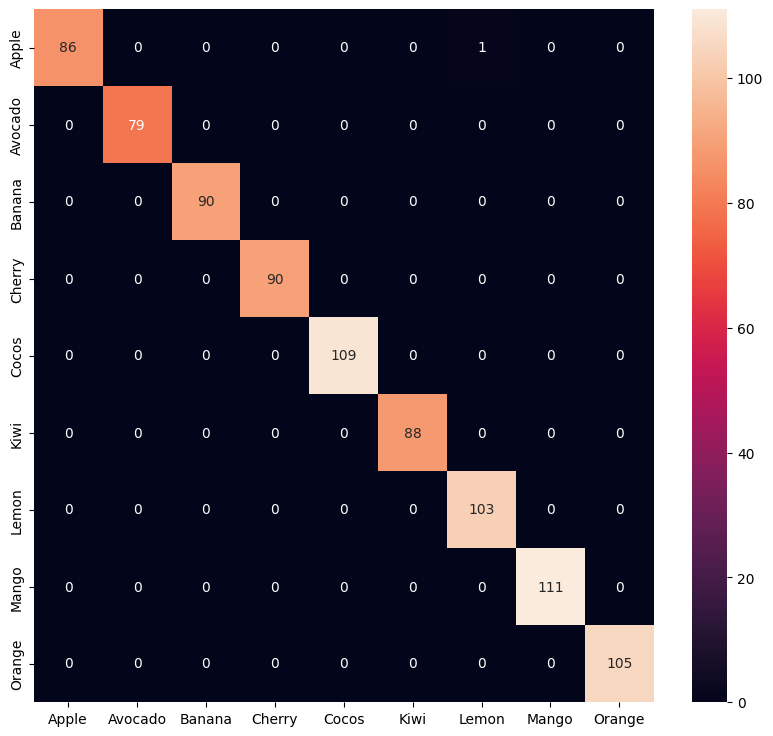

In [14]:
#confusion matrix
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()


We can see error values on validation data

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


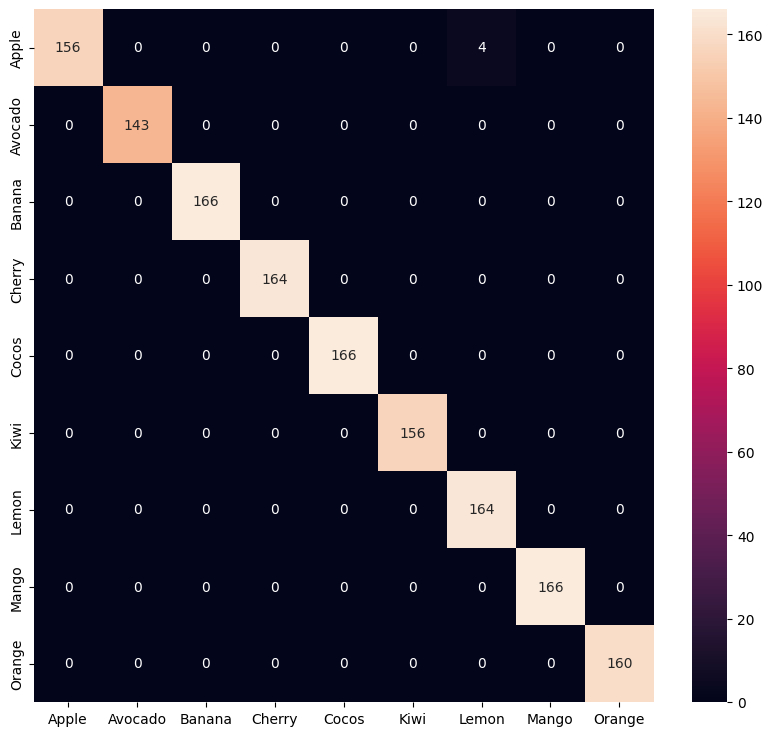

In [15]:
#confusion matrix
y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()


Here we checked error on test data. We almost no have false detection in test set except false results of Banana and Lemon classes

In conclusion we used CNN method to check nine types of fruit. We have training accuracy around 95% and it is really acceptable.
If you have any question feel free to contact with me.